[*********************100%***********************]  1 of 1 completed


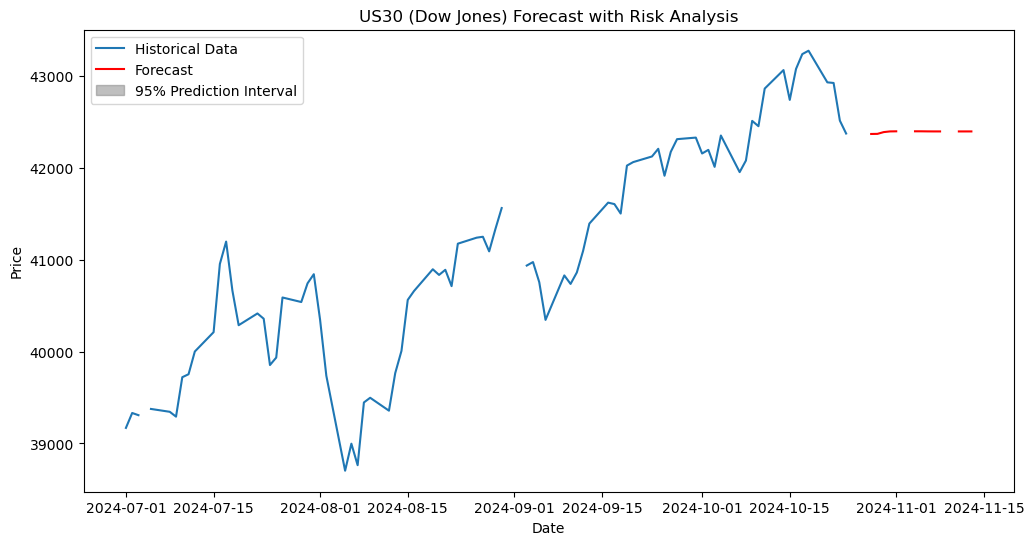

Mean Forecast Value: 42392.668103439224
Standard Deviation of Forecast: 10.736476433228773


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

# Fetch US30 data
ticker_symbol = '^DJI'
us30_data = yf.download(ticker_symbol, start='2024-07-01', end=datetime.now().strftime('%Y-%m-%d'))

# Prepare the data
us30_data = us30_data['Close']  # Use closing prices
us30_data = us30_data.asfreq('B')  # Business days frequency

# Fit ARIMA model
model = ARIMA(us30_data, order=(5, 1, 0))  # (p,d,q) values can be tuned
model_fit = model.fit()

# Forecast for the next month (20 business days)
forecast_steps = 20
forecast_results = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int(alpha=0.05)  # 95% CI

# Prepare future dates for the forecast
last_date = us30_data.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, forecast_steps + 1)]
forecast_series = pd.Series(forecast, index=future_dates)
conf_int_series = pd.DataFrame(conf_int, index=future_dates, columns=['Lower', 'Upper'])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(us30_data, label='Historical Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(conf_int_series.index, conf_int_series['Lower'], conf_int_series['Upper'], color='gray', alpha=0.5, label='95% Prediction Interval')
plt.title('US30 (Dow Jones) Forecast with Risk Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Risk Metrics
mean_forecast = np.mean(forecast)
std_forecast = np.std(forecast)

print(f"Mean Forecast Value: {mean_forecast}")
print(f"Standard Deviation of Forecast: {std_forecast}")
